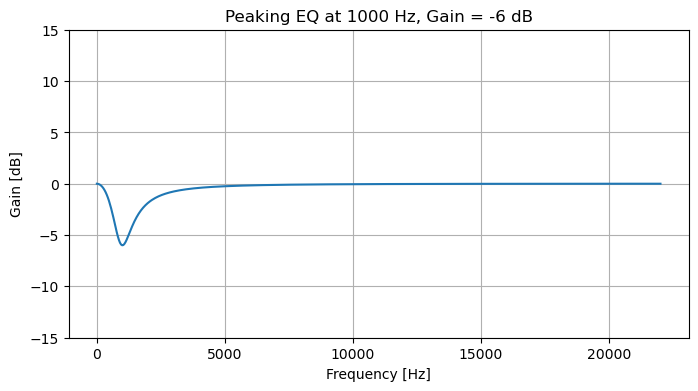

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

def peaking_eq(f0, gain_db, Q, fs):
    """
    Design a peaking EQ filter.
    
    Parameters:
        f0 : float      # center frequency in Hz
        gain_db : float # gain in dB (+boost, -cut)
        Q : float       # quality factor
        fs : float      # sampling rate in Hz
        
    Returns:
        b, a : filter coefficients
    """
    A = 10**(gain_db / 40)  # amplitude
    omega = 2 * np.pi * f0 / fs
    alpha = np.sin(omega) / (2 * Q)

    b0 = 1 + alpha * A
    b1 = -2 * np.cos(omega)
    b2 = 1 - alpha * A
    a0 = 1 + alpha / A
    a1 = -2 * np.cos(omega)
    a2 = 1 - alpha / A

    b = np.array([b0, b1, b2]) / a0
    a = np.array([a0, a1, a2]) / a0
    return b, a

def plot_filter_response(b, a, fs, title="Filter Response"):
    w, h = freqz(b, a, fs=fs)
    plt.figure(figsize=(8, 4))
    plt.plot(w, 20 * np.log10(abs(h)))
    plt.title(title)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Gain [dB]')
    plt.grid()
    plt.ylim(-15, 15)
    plt.show()

# Parameters
fs = 44100         # Sampling rate (Hz)
f0 = 1000          # Center frequency (Hz)
gain_db = -6        # Gain in dB
Q = 1.0            # Quality factor

# Design and plot
b, a = peaking_eq(f0, gain_db, Q, fs)
plot_filter_response(b, a, fs, f"Peaking EQ at {f0} Hz, Gain = {gain_db} dB")
